In [30]:
#!pip install xgboost

/bin/sh: 1: pip: not found


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import xgboost
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [32]:
df = pd.read_csv("MLDataset.csv",header = None)

In [33]:
df.shape

(539, 292)

In [34]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 291].values

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [36]:
y_train = y_train.reshape((431,1))

In [37]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [39]:
'''#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]
}

                    
#xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')
gsearch1.fit(x_train,y_train)'''

"#for tuning parameters\nparameters_for_testing = {\n    'colsample_bytree':[0.4,0.6,0.8],\n    'gamma':[0,0.03,0.1,0.3],\n    'min_child_weight':[1.5,6,10],\n    'learning_rate':[0.1,0.07],\n    'max_depth':[3,5],\n    'n_estimators':[10000],\n    'reg_alpha':[1e-5, 1e-2,  0.75],\n    'reg_lambda':[1e-5, 1e-2, 0.45],\n    'subsample':[0.6,0.95]\n}\n\n                    \n#xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,\n#     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)\n\ngsearch1 = GridSearchCV(estimator = model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')\ngsearch1.fit(x_train,y_train)"

In [41]:
'''print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)'''

"print (gsearch1.grid_scores_)\nprint('best params')\nprint (gsearch1.best_params_)\nprint('best score')\nprint (gsearch1.best_score_)"

In [50]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
bst = best_xgb_model.fit(x_train,y_train)

In [51]:
y_pred = best_xgb_model.predict(x_test)

In [52]:
metrics.r2_score(y_test, y_pred)

0.742829219245744

In [53]:
df_repre = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

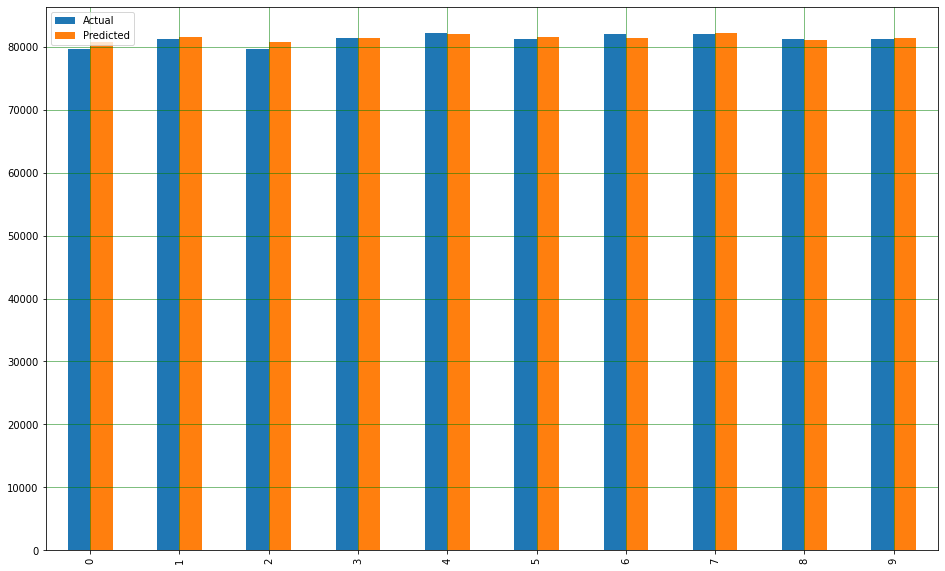

In [54]:
df1 = df_repre.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [57]:
#xgboost.plot_importance(bst)

In [59]:
#xgboost.plot_tree(bst)

In [61]:
#xgboost.to_graphviz(bst, num_trees=2)